In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from typing import Tuple

In [2]:
DATA_PTH, OUTPUT_PTH = "data", "output"

In [3]:
def plot_one_series(series: pd.Series, title: str, save=False):
    plt.figure(figsize=(10, 6))
    series.plot(color='blue', linewidth=2)
    plt.title(title)
    plt.xlabel('Timestamp')
    plt.ylabel('Signal')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    if save: plt.savefig(f"image/{title}.png")
    plt.show()

In [4]:
def plot_two_series(series_raw: pd.Series, series_filtered: pd.Series, title: str):
    plt.figure(figsize=(10, 6))
    series_raw.plot(label='DMP data', color='blue', linewidth=2)
    series_filtered.plot(label='Filtered data', color='red', linewidth=2)
    plt.title(title)
    plt.xlabel('Timestamp')
    plt.ylabel('Signal')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"image/{title}.png")
    plt.show()

In [5]:
def plot_three_series(series_raw: pd.Series, series_bw: pd.Series, series_estimate: pd.Series, title: str, save=False):
    plt.figure(figsize=(10, 6))
    series_raw.plot(label='DMP data', color='blue', linewidth=2)
    series_bw.plot(label='Butterworth data', color='red', linewidth=2)
    if series_estimate is not None: series_estimate.plot(label='Estimate data', color='green', linewidth=2)
    plt.title(title)
    plt.xlabel('Timestamp')
    plt.ylabel('Signal')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    if save: plt.savefig(f"image/{title}.png")
    plt.show()

In [6]:
def compare(raw_signal_df: pd.DataFrame, filtered_df: pd.DataFrame) -> Tuple[Tuple[pd.Series, pd.Series], Tuple[pd.Series, pd.Series], Tuple[pd.Series, pd.Series]]:
    dmp_roll, dmp_pitch, dmp_yaw = raw_signal_df["DMP Roll"], raw_signal_df["DMP Pitch"], raw_signal_df["DMP Yaw"]
    filtered_roll, filtered_pitch, filtered_yaw = filtered_df["Filtered Roll"], filtered_df["Filtered Pitch"], filtered_df["Filtered Yaw"]
    assert dmp_roll.shape == filtered_roll.shape
    assert dmp_pitch.shape == filtered_pitch.shape
    assert dmp_yaw.shape == filtered_yaw.shape
    return (dmp_roll, filtered_roll), (dmp_pitch, filtered_pitch), (dmp_yaw, filtered_yaw)

In [12]:
def main(signal_type: str, title: str):
    assert signal_type in ("roll", "pitch", "yaw")
    raw_signal_df, filtered_df = pd.read_csv(os.path.join(DATA_PTH, signal_type + ".csv")), pd.read_csv(os.path.join(OUTPUT_PTH, signal_type + ".csv"))
    roll_series, pitch_series, yaw_series = compare(raw_signal_df, filtered_df)
    raw_roll, raw_pitch, raw_yaw = raw_signal_df["Raw Roll"], raw_signal_df["Raw Pitch"], raw_signal_df["Raw Yar"]
    bw_roll, bw_pitch, bw_yaw = filtered_df["Butterworth Roll"], filtered_df["Butterworth Pitch"], filtered_df["Butterworth Yaw"]
    estimated_roll, estimated_pitch = filtered_df["Estimated Roll"], filtered_df["Estimated Pitch"]
    #plot_one_series(raw_roll, f"{title}_Raw_roll")
    plot_two_series(roll_series[0], roll_series[1], f"{title}_Filter_Roll")
    plot_three_series(roll_series[0], bw_roll, estimated_roll, f"{title}_Debug_Roll", True);
    plot_one_series(raw_pitch, f"{title}_Raw_pitch")
    plot_two_series(pitch_series[0], pitch_series[1], f"{title}_Filter_Pitch")
    plot_three_series(pitch_series[0], bw_pitch, estimated_pitch, f"{title}_Debug_Pitch", True)
    #plot_one_series(raw_yaw, f"{title}_Raw_yaw")
    #plot_two_series(yaw_series[0], yaw_series[1], f"{title}_Filter_Yaw")

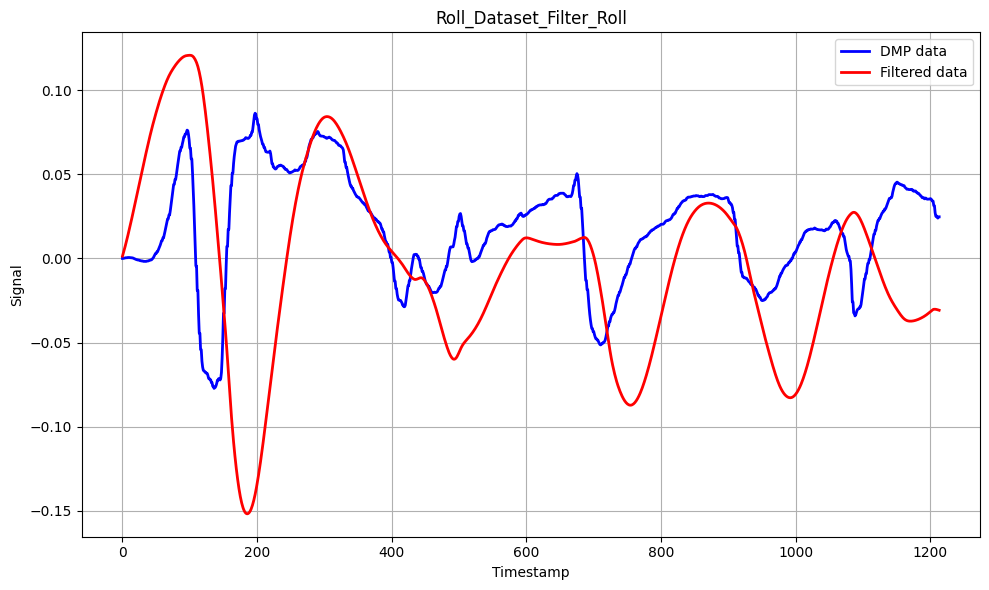

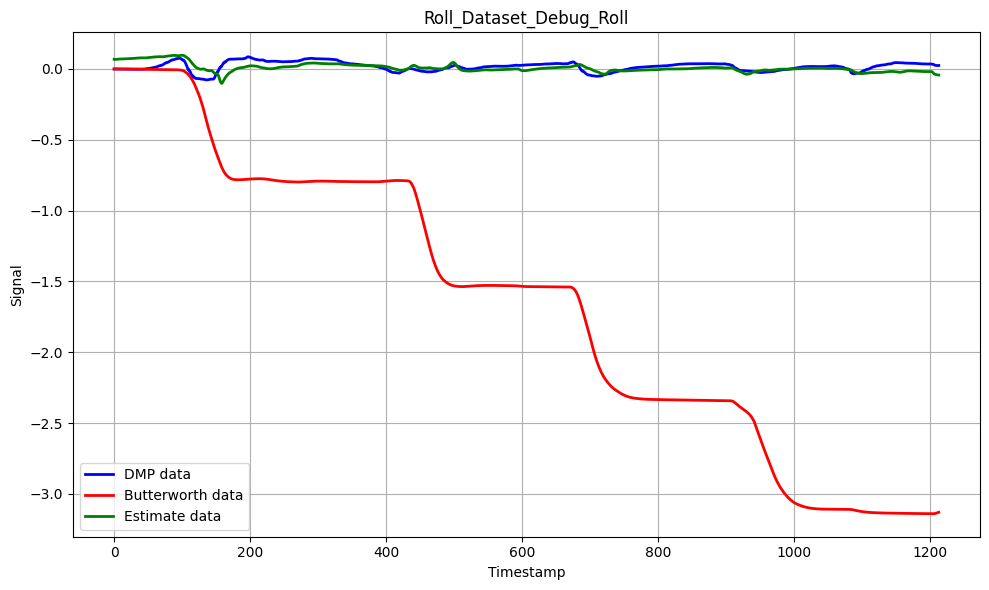

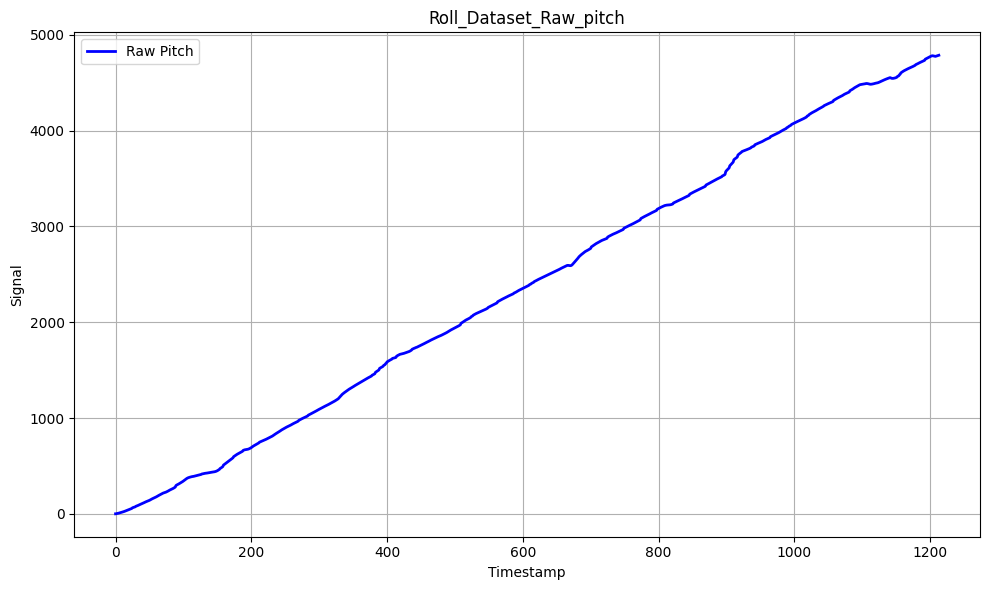

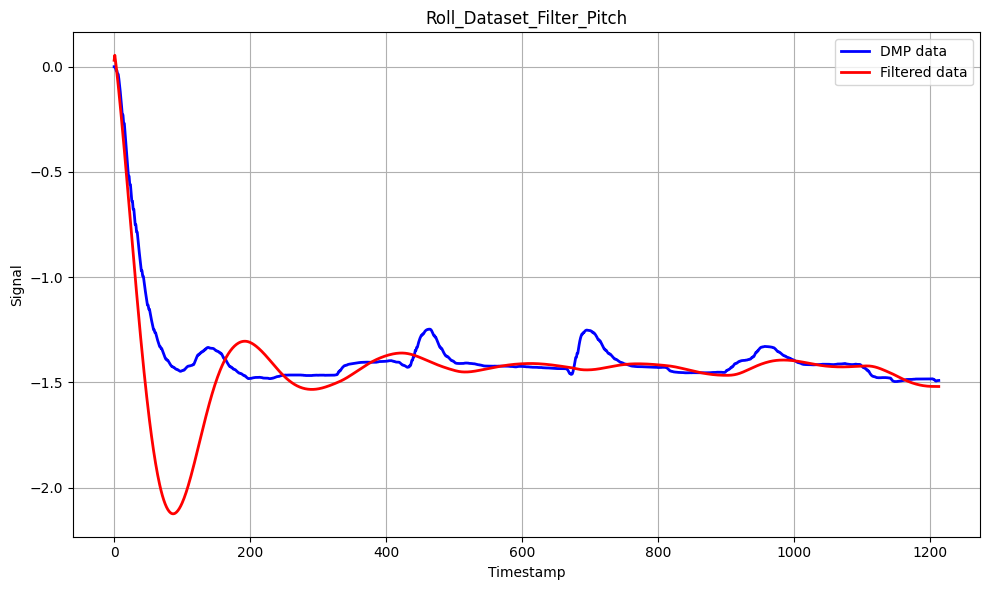

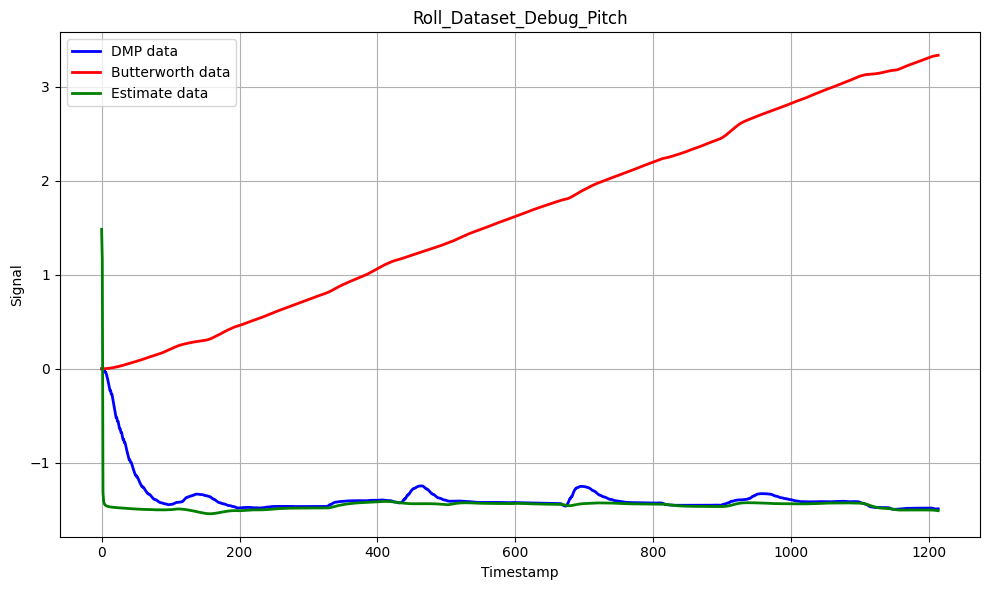

In [14]:
main("roll", "Roll_Dataset")